# The Ising model II

In [0]:
import scipy
from matplotlib import pyplot as plt

In [0]:
class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
        '''
        self.size = size
        self.temperature = temperature
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        return -self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1))).sum()

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        return self.state.mean()
        
    def update(self, annealing=False, ann_iter=0):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        delta_E = 2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]
        
        self.step += 1
        
        if annealing:
            if self.step%ann_iter==0 and self.temperature>1:
                self.temperature -= 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Temperature: '+ str(self.temperature) + '\nStep: ' + \
                  str(self.step) + ', M = ' + str(self.average_magnetism()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


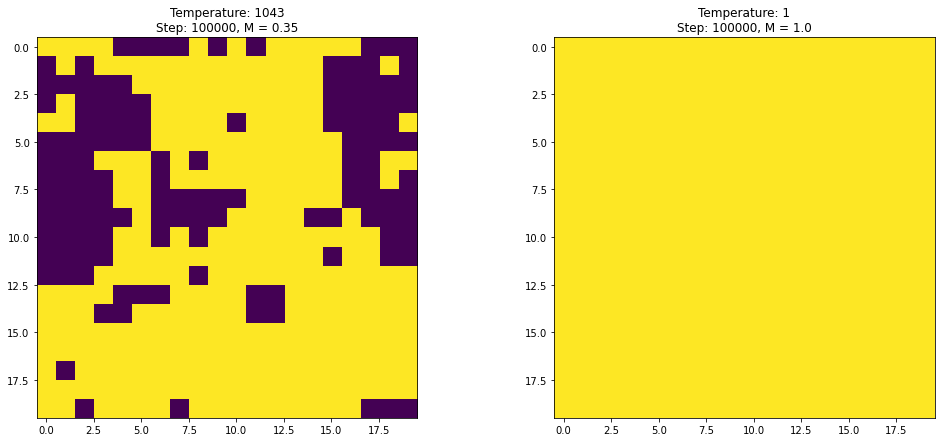

In [7]:
size = 20

plt.figure( figsize=(17, 7))
plt.subplot(1,2,1)
# Ising model at the Curie temperature
sim = IsingSimulation(size, temperature=1043)
for _ in range(10**5):
    sim.update()
sim.display()


plt.subplot(1,2,2)
sim = IsingSimulation(size, temperature=1)
for _ in range(10**5):
    sim.update()
sim.display()
plt.show()

# Task I
From the study guide, we know that the Boltzmann distribution tells us what the probability is of observing a state at equilibrium. At low temperatures, we expect the states where all cells have the same sign (either all + or all – ) to be much more probable than any other state. So if we start from a random initial state, we should drop into one of those two states eventually.

Test whether this indeed happens.

- Randomly initialize the simulation, set the temperature to 1 (that is 1 Kelvin, which is close to absolute 0 — a theoretically unobtainable temperature), and wait for the simulation state to stabilize (this might take up to 100,000 steps).
- Measure the average magnetization of the final state.
- Repeat this simulation a number of times to get a probability distribution over the average magnetization. Theoretically, the distribution should be evenly split between +1 and –1, but you will find that the simulation often gets stuck in a suboptimal state with a different average magnetization.

In [0]:
def run_sim(T, steps):
    size = 20
    sim = IsingSimulation(size, temperature=T)
    for _ in range(steps):
        sim.update()
    return sim.average_magnetism()

In [22]:
meas = []
for _ in range(100):
    if _%10==0: print('processing {}'.format(_))
    meas.append(run_sim(1, 10**5))

processing 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


processing 10
processing 20
processing 30
processing 40
processing 50
processing 60
processing 70
processing 80
processing 90


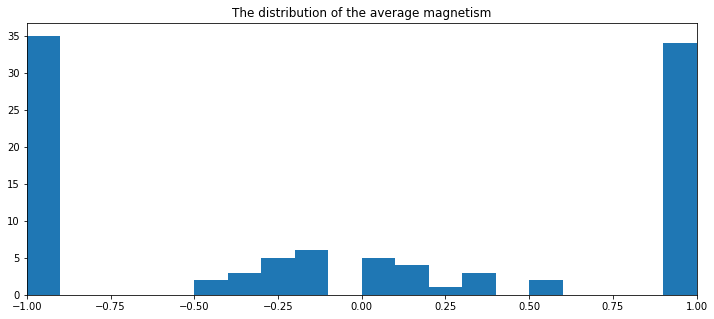

In [24]:
plt.figure(figsize=(12, 5))
plt.hist(meas, bins=20, density=False)
plt.xlim(-1, 1)
plt.title('The distribution of the average magnetism')
plt.show()

- Explain what would happen to the acceptance probability of the update step if the temperature is set to 0. This motivates why we always set the temperature at least slightly greater than 0.

$$p\left(x\right)\propto e^{-\frac{E\left(x\right)}{T}}$$

$$\frac{p\left(y\right)}{p\left(x\right)}=e^{\frac{E\left(x\right)-E\left(y\right)}{T}}$$

$$\frac{p\left(y\right)}{p\left(x\right)}=e^{\frac{^{-2\times s_{i,j}\sum_{i,j}^{\left[-1,1\right]}s_{i,j}}}{T}}$$ \\

If the temperature is set to 0 then the acceptance probability cannot be computed because we can't divide over 0. As the value of the temperature tends towards 0 then the acceptance probability would converge towards 1. 

# Task II
- Start from a random initial state, as before, but rather than setting the temperature to 1 K straight away, start from T = 2000 K and decrease it by 1 K after every 100 update steps until you reach a value of T = 1 K. Wait for the simulation state to stabilize.
- What is the distribution over average magnetization now? (You can get even better results by decreasing the temperature more slowly, for example, 1 K after every 400 steps.)

In [0]:
def run_sim_ann(T, steps, ann_iter):
    size = 20
    sim = IsingSimulation(size, temperature=T)
    for _ in range(steps):
        sim.update(annealing=True, ann_iter=ann_iter)
    return sim.average_magnetism()

In [15]:
# FOR DECREMENTING TEMPERATURE EVERY 200 STEPS
meas_200 = []
for _ in range(100):
    if _%10==0: print('processing {}'.format(_))
    meas_200.append(run_sim_ann(2000, 5*10**5, 200))

processing 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


processing 10
processing 20
processing 30
processing 40
processing 50
processing 60
processing 70
processing 80
processing 90


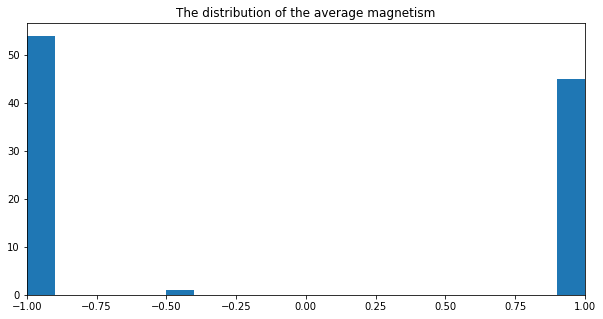

In [25]:
plt.figure(figsize=(10, 5))
plt.hist(meas_200, bins=20)
plt.xlim(-1, 1)
plt.title('The distribution of the average magnetism')
plt.show()

In [18]:
# FOR DECREMENTING TEMPERATURE EVERY 400 STEPS
meas_400 = []
for _ in range(100):
    if _%10==0: print('processing {}'.format(_))
    meas_400.append(run_sim_ann(2000, 10**6, 400))

processing 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


processing 10
processing 20
processing 30
processing 40
processing 50
processing 60
processing 70
processing 80
processing 90


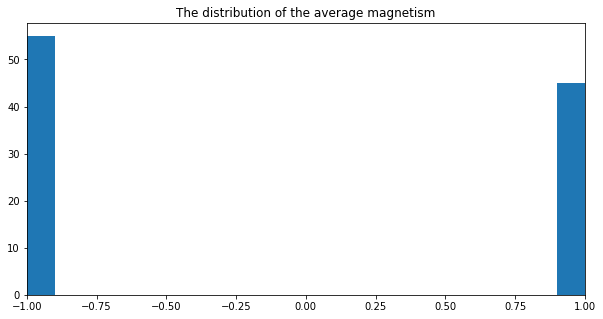

In [26]:
plt.figure(figsize=(10, 5))
plt.hist(meas_400, bins=20)
plt.xlim(-1, 1)
plt.title('The distribution of the average magnetism')
plt.show()

As opposed to running the simulation for temperature equal to 1, the distribution for using simulation annealing set to either 1 or -1.